In [1]:
import numpy as np

import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.func as func
import mlgrad.risk as risk

from mlgrad import erm_fg, erm_irgd, fg, weights, averager_it, erisk2, sg, erm_sg

from pprint import pprint

from axon import loads, dumps
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
X, Y = digits.data, digits.target
print(X.shape)
#scaler = MinMaxScaler()
#Xt = scaler.fit_transform(X)
Xt = X / 16.

(1797, 64)


In [3]:
def sigma_neuron_layer2(n_input, n_output):
    layer = model.GeneralModelLayer(n_input)
    outfunc = func.Arctang()
    for i in range(n_output):
        mod = model.SigmaNeuronModel(outfunc, n_input)
        layer.models.append(mod)
    layer.n_input = n_input
    layer.n_output = n_output
    layer.n_param = sum(mod.n_param for mod in layer.models)
    return layer

def linear_neuron_layer2(n_input, n_output):
    layer = model.GeneralModelLayer(n_input)
    for i in range(n_output):
        mod = model.LinearModel(n_input)
        layer.models.append(mod)
    layer.n_input = n_input
    layer.n_output = n_output
    layer.n_param = sum(mod.n_param for mod in layer.models)
    return layer

In [4]:
def sigma_neuron_layer(n_input, n):
    layer = model.SigmaNeuronModelLayer(func.Arctang(), n_input, n)
    return layer

def linear_neuron_layer(n_input, n):
    layer = model.SigmaNeuronModelLayer(func.Id(), n_input, n)
    return layer


In [5]:
def binarize(Y, n):
    rows = []
    for y in Y:
        row = np.zeros(n, 'd')
        row[y] = 1
        row = 2*row-1
        rows.append(row)
    return np.array(rows)

Ys = binarize(Y, 10)
print(Ys.shape, Xt.shape)
#print([y for y in Ys])

(1797, 10) (1797, 64)


In [6]:
n_input = 64
n_hidden = 15
layer1 = sigma_neuron_layer(n_input, n_hidden)
layer2 = linear_neuron_layer(n_hidden, 10)

ffnn = model.FFNetworkModel()
ffnn.add(layer1)
ffnn.add(layer2)

ffnn.allocate()

In [1]:
ffnn.param[:] = np.random.random(size=ffnn.n_param)

NameError: name 'np' is not defined

In [48]:
loss_func = loss.ErrorMultLoss(func.Square())
batch = risk.make_batch(len(Xt), 200)
er = erisk2(Xt, Ys, ffnn, loss_func, batch=batch)
_fg = erm_fg(er, h=0.0001, tol=1.0e-6, n_iter=1000)

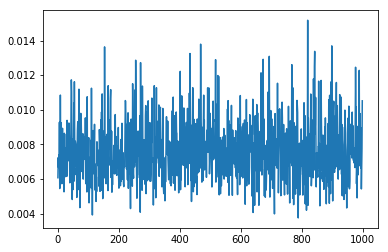

In [49]:
plt.plot(_fg.lvals)
plt.show()

In [50]:
np.sum([np.argmax(ffnn(x)) == y for x,y in zip(Xt,Y)])/len(Y)

0.9905397885364496

In [ ]:
#np.sum(np.equal([np.sum(np.sign(ffnn(x)*y)) for x,y in zip(Xt,Ys)], 10))/len(Y)

In [ ]:
#plt.plot(np.sort([np.sum(np.abs(ffnn(x)-y)) for x,y in zip(Xt,Ys)]))
#plt.show()

In [ ]:
ffnn.param[:] = np.random.random(size=ffnn.n_param)

In [ ]:
loss_func = loss.ErrorMultLoss(func.Square())
er2 = erisk2(Xt, Ys, ffnn, loss_func)
fg2 = fg(er2, h=0.002, tol=1.0e-7, )
avg2 = averager_it(func.QuantileFunc(0.95, func.Sqrt(0.001)))
wg2 = weights.WMWeights(avg2, er2)
alg = erm_irgd(fg2, wg2, n_iter=30)
Yp2 = np.array([ffnn(x) for x in Xt])

In [ ]:
plt.plot(alg.lvals)
plt.show()

In [ ]:
np.sum([np.argmax(ffnn(x)) == y for x,y in zip(Xt,Y)])/len(Y)